In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
data_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Data%20Science%20on%20Reddit/data_science.csv")

In [3]:
data_df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,STEM Career Change,5,swvi7j,https://www.reddit.com/r/datascience/comments/...,6,1.645341e+09,I’m currently working as a field biologist for...,2022-02-20 09:17:13
1,Comment,79,hxct3v5,NaN,0,1.645130e+09,DataScientologists,2022-02-17 22:34:46
2,Comment,1,hxcsshc,NaN,0,1.645130e+09,Sounds like you'll need some sort of fuzzy mat...,2022-02-17 22:32:44
3,Comment,2,hxcva4l,NaN,0,1.645131e+09,Best of both worlds. Work in DS without workin...,2022-02-17 22:48:40
4,Comment,1,hxcuqf2,NaN,0,1.645131e+09,"Hi u/Ok_Acanthisitta5478, I removed your submi...",2022-02-17 22:45:11


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      2499 non-null   object 
 1   score      2499 non-null   int64  
 2   id         2499 non-null   object 
 3   url        945 non-null    object 
 4   comms_num  2499 non-null   int64  
 5   created    2499 non-null   float64
 6   body       2403 non-null   object 
 7   timestamp  2499 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 156.3+ KB


In [5]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "reddit"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

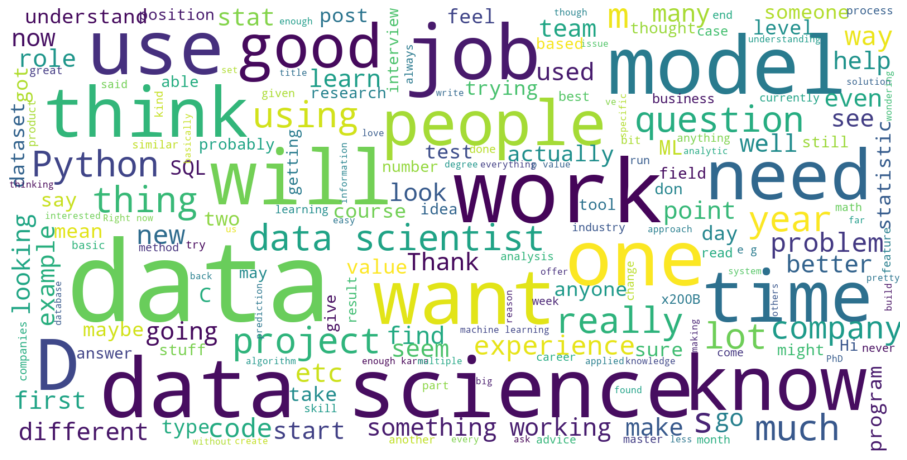

In [6]:
show_wordcloud(data_df['body'], title = '', mask=None)

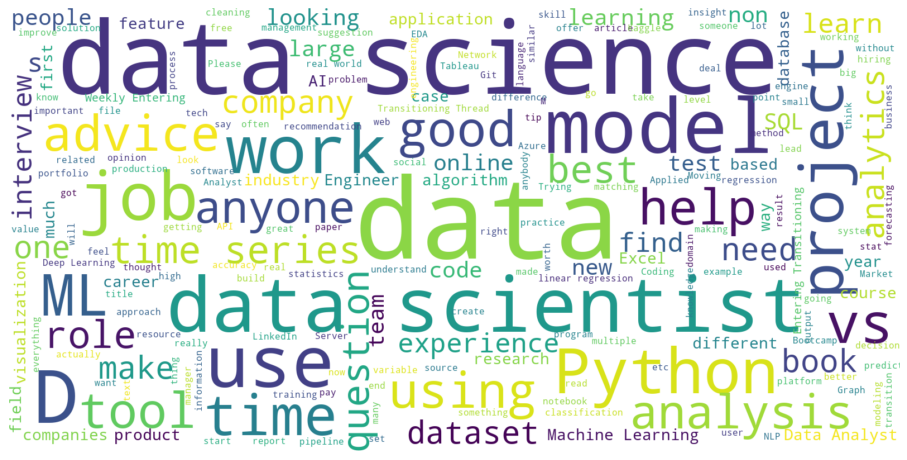

In [7]:
show_wordcloud(data_df['title'], title = '', mask=None)

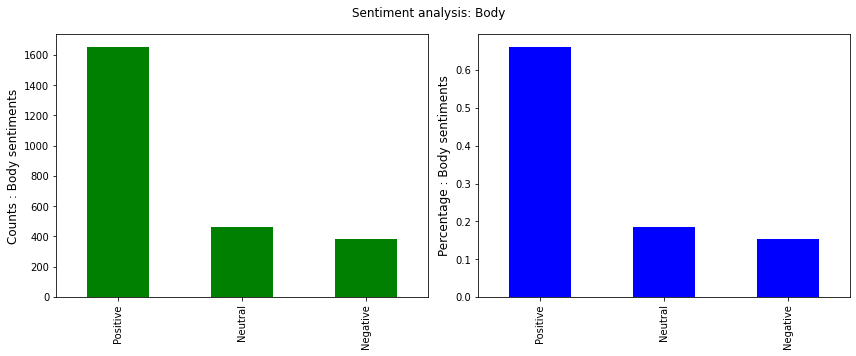

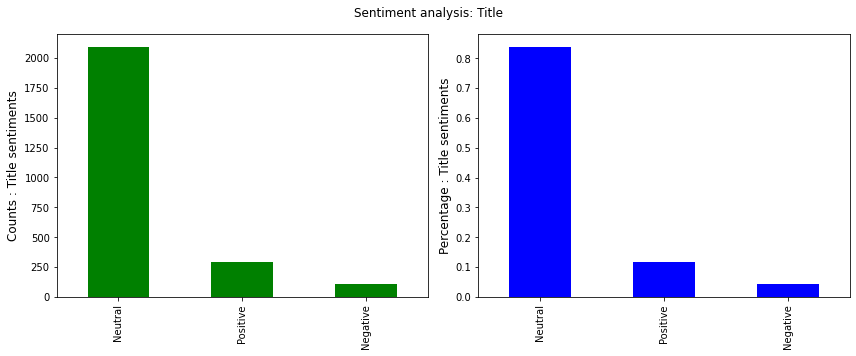

In [9]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()
data_df['body_sentiment'] = data_df['body'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'body_sentiment', 'Body')

data_df['title_sentiment'] = data_df['title'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'title_sentiment', 'Title')

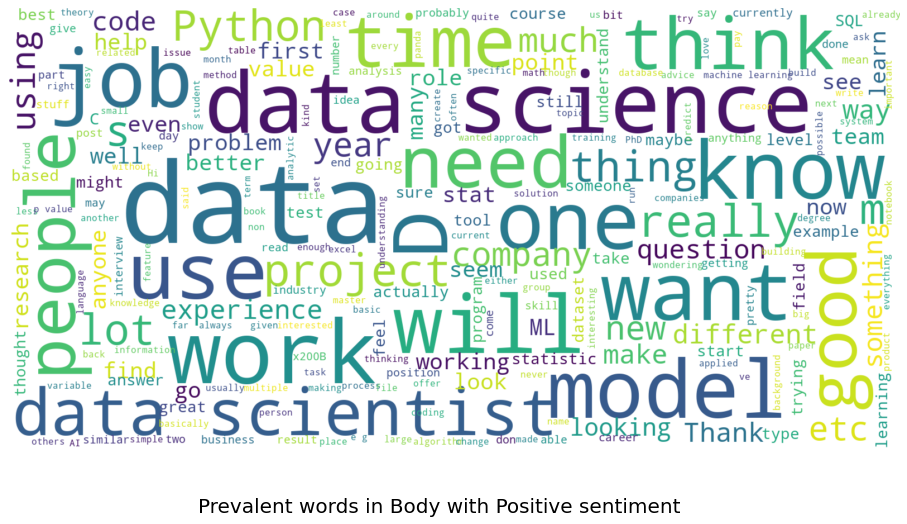

In [10]:
show_wordcloud(data_df.loc[data_df['body_sentiment']=="Positive", 'body'], title = 'Prevalent words in Body with Positive sentiment', mask=None)

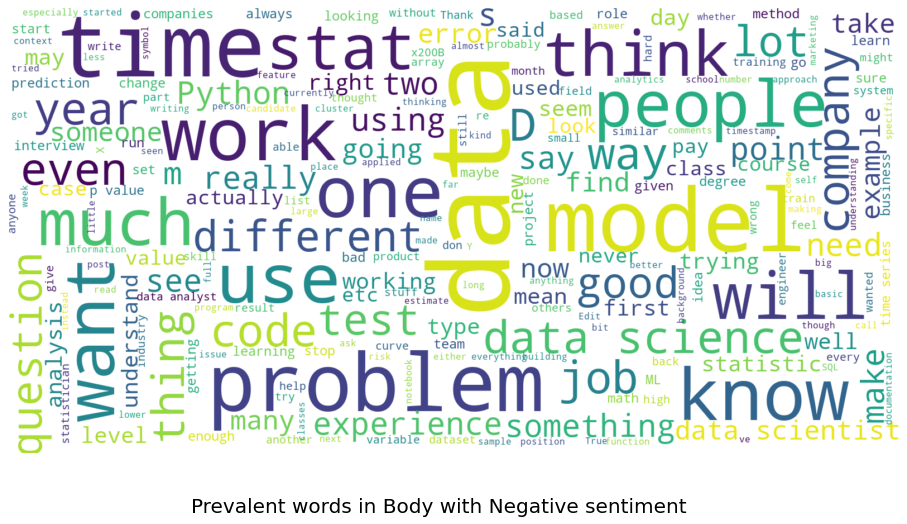

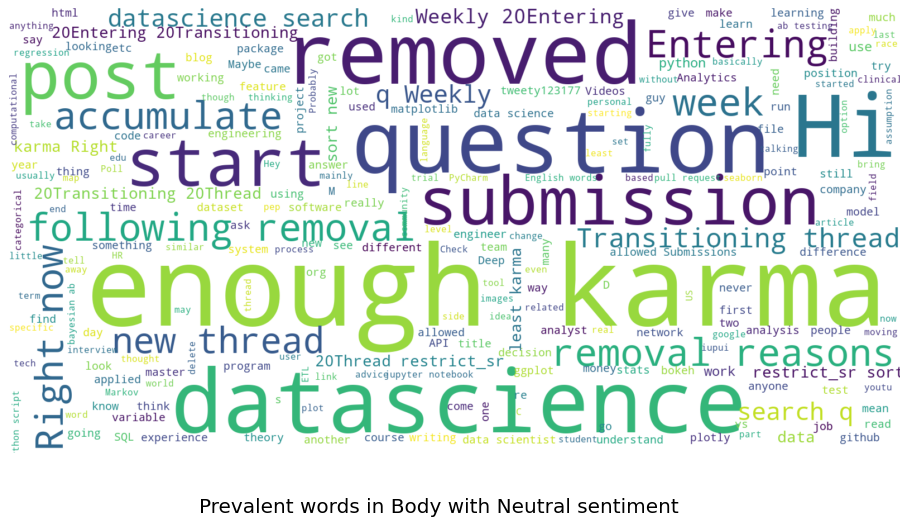

In [11]:
show_wordcloud(data_df.loc[data_df['body_sentiment']=="Negative", 'body'], title = 'Prevalent words in Body with Negative sentiment', mask=None)

show_wordcloud(data_df.loc[data_df['body_sentiment']=="Neutral", 'body'], title = 'Prevalent words in Body with Neutral sentiment', mask=None)

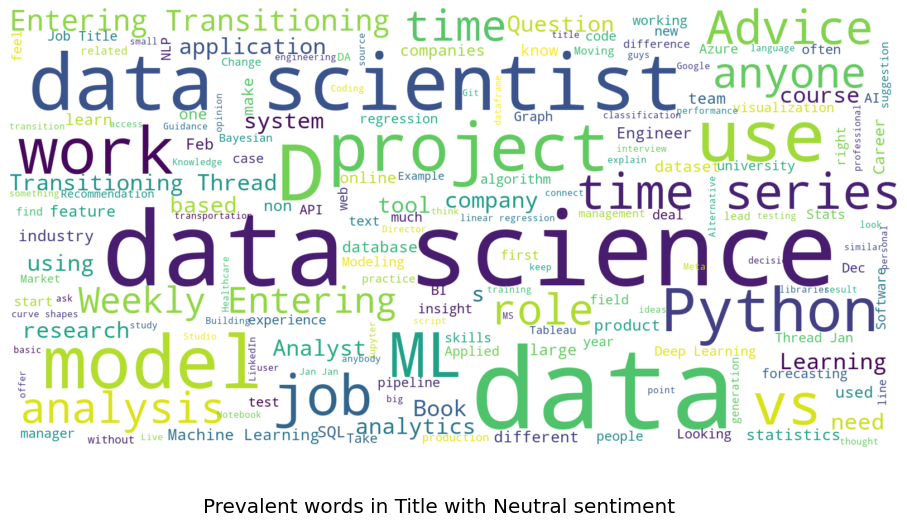

In [12]:
show_wordcloud(data_df.loc[data_df['title_sentiment']=="Neutral", 'title'], title = 'Prevalent words in Title with Neutral sentiment', mask=None)

In [13]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
sample_text_df = data_df[["body"]].dropna()
text_sample = sample_text_df["body"].sample(n=sample_text_df.shape[0], random_state=0).values


print('Text sample vectorization: {}'.format(text_sample[9]))
document_term_matrix = count_vectorizer.fit_transform(text_sample)
print('Text sample vectorization: \n{}'.format(document_term_matrix[9]))

Text sample vectorization: so uh... regression using deep learning is kinda saying "building a motor using a car"

a neural net with a single neuron and a single layer is in fact nothing else than multinomial linear regression.
(in a NN you would additionally normaloze the output with a sigmoid )

there is basically 3 forms of linear regression:
- standard regression (no regularization)
- ridge regression (you have a regularization hyperparameter)
- LASSO regression: you have regularization where basically your weights have a threshold and are either 0 or 1. this makes it in many cases easier to determine important variables
Text sample vectorization: 
  (0, 7277)	1
  (0, 9300)	2
  (0, 10726)	2
  (0, 6087)	2
  (0, 8456)	6
  (0, 5835)	1
  (0, 10525)	1
  (0, 2986)	1
  (0, 5983)	1
  (0, 8934)	1
  (0, 1747)	1
  (0, 6722)	1
  (0, 1859)	1
  (0, 6902)	1
  (0, 6893)	1
  (0, 6907)	1
  (0, 5955)	1
  (0, 4077)	1
  (0, 6759)	1
  (0, 6955)	1
  (0, 778)	1
  (0, 6993)	1
  (0, 9257)	1
  (0, 1417)	2
  

In [14]:
n_topics = 10
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(document_term_matrix)

In [15]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
lsa_keys = get_keys(lda_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [16]:
top_n_words_lsa = get_top_n_words(n_topics, lsa_keys, document_term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  data like just work science don time use know want
Topic 2:  png curves dtw data id time https timestamp curve width
Topic 3:  plot https observablehq altair graphics com grammar drop 128 kills
Topic 4:  karma thread datascience new questions search transitioning https com www
Topic 5:  data model time number dataset using models cluster train set
Topic 6:  114 like recall criminals 57 33 percent contains dataset person
Topic 7:  py user opt packages anaconda3 users site python3 lib use
Topic 8:  value null test data hypothesis question alpha sample just think
Topic 9:  com https 3d plotly data reach 7c3000 7c637792493097700145 7c72f988bf86f141af91ab2d7cd011db47 7c2c87f6fc8c97416da47008d9e4e4ae96
Topic 10:  https com www 11 14 like reddit data youtube use
